In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stat
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import math

In [22]:
from research.strings import VIOLATIONS, MONTHS

In [23]:
df_canvass = pd.read_csv("data/canvass_records.csv.gz")
df_complaint = pd.read_csv("data/complaint_records.csv.gz")
df_canvass["aka_name"] = df_canvass["aka_name"].fillna("NULL_NAME")
df_complaint["aka_name"] = df_complaint["aka_name"].fillna("NULL_NAME")
df_canvass["critical_found"] = df_canvass[VIOLATIONS].max(axis=1)
df_complaint["critical_found"] = df_complaint[VIOLATIONS].max(axis=1)
print("Read {} canvass records.".format(len(df_canvass)))
print("Read {} complaint records.".format(len(df_complaint)))

Read 50462 canvass records.
Read 17088 complaint records.


In [79]:
rest_name = "subway"
rest_can = df_canvass[df_canvass["aka_name"].str.contains(rest_name, case=False)]
rest_com = df_complaint[df_complaint["aka_name"].str.contains(rest_name, case=False)]
print("Found {} canvass inspections for '%{}%'".format(len(rest_can), rest_name))
print("Found {} complaint inspections for '%{}%'".format(len(rest_com), rest_name))

Found 2154 canvass inspections for '%subway%'
Found 535 complaint inspections for '%subway%'


In [26]:
bef_can = rest_can.query("year < 2015")
aft_can = rest_can.query("year >= 2015")
bef_com = rest_com.query("year < 2015")
aft_com = rest_com.query("year >= 2015")
print("Before: {} canvass inspections.".format(len(bef_can)))
print("After: {} canvass inspections.".format(len(aft_can)))
print("Before: {} complaint inspections.".format(len(bef_com)))
print("After: {} complaint inspections.".format(len(aft_com)))

Before: 1132 canvass inspections.
After: 1022 canvass inspections.
Before: 329 complaint inspections.
After: 206 complaint inspections.


In [29]:
ser_bef_can = bef_can.groupby("month")["critical_found"].mean()
ser_aft_can = aft_can.groupby("month")["critical_found"].mean()
ser_bef_com = bef_com.groupby("month")["critical_found"].mean()
ser_aft_com = aft_com.groupby("month")["critical_found"].mean()

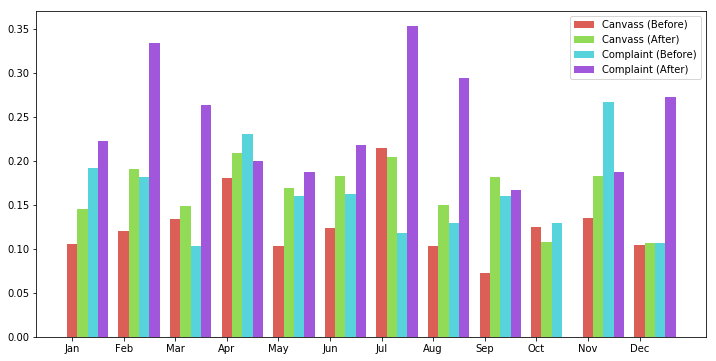

In [47]:
pal = sns.color_palette("hls", 4)
r = 1
w = 0.8 / 4
plt.bar(0*w + ser_bef_can.index, ser_bef_can.values, width=r*w, color=pal[0], label="Canvass (Before)")
plt.bar(1*w + ser_aft_can.index, ser_aft_can.values, width=r*w, color=pal[1], label="Canvass (After)")
plt.bar(2*w + ser_bef_com.index, ser_bef_com.values, width=r*w, color=pal[2], label="Complaint (Before)")
plt.bar(3*w + ser_aft_com.index, ser_aft_com.values, width=r*w, color=pal[3], label="Complaint (After)")
plt.xticks(range(1, len(MONTHS) + 1), MONTHS)
plt.gcf().set_size_inches(12, 6)
plt.legend()
plt.show()

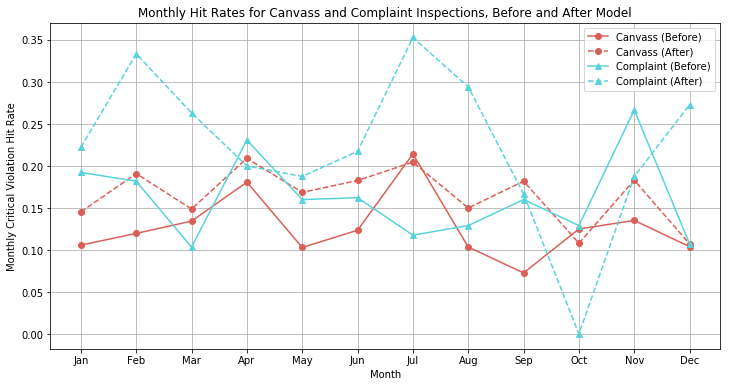

In [80]:
pal = sns.color_palette("hls", 2)
plt.plot(ser_bef_can.index, ser_bef_can.values, color=pal[0], label="Canvass (Before)", marker="o")
plt.plot(ser_aft_can.index, ser_aft_can.values, color=pal[0], label="Canvass (After)", marker="o", linestyle="--")
plt.plot(ser_bef_com.index, ser_bef_com.values, color=pal[1], label="Complaint (Before)", marker="^")
plt.plot(ser_aft_com.index, ser_aft_com.values, color=pal[1], label="Complaint (After)", marker="^", linestyle="--")
plt.xticks(range(1, len(MONTHS) + 1), MONTHS)
plt.xlabel("Month")
plt.ylabel("Monthly Critical Violation Hit Rate")
plt.title("Monthly Hit Rates for Canvass and Complaint Inspections, Before and After Model")
plt.grid()
plt.legend()
plt.gcf().set_size_inches(12, 6)
plt.show()